# INTRODUCTION

In this coursework we'll do data exploration, preparation and analysis, correlation and feature selection, probabilistic data analysis and clustering

# DATA EXPLORATION

## Loading the data

We Have been provided with CSV files containing instances of road sign images that are gray-scalled. I have already downloaded these, and written a library (see the model folder) to read CSV files and return a Pandas dataframe, and to write pandas dataframes into HDF5 files.

Let's go ahead and load the images CSV.

In [1]:
# First we add the project into PYTHONPATH so our notebook can access the code in our MVC structure
import set_sys_path

In [2]:
# Now we import the data read-write library from the model package, and initialise the read and write objects
from classy.model.data.read import Reader
from classy.model.data.write import Writer

reader = Reader()
writer = Writer()

In [3]:
# Let's see what data we have been provided with
reader.list_data_files(file_type="csv")

['y_train_smpl_0.csv',
 'y_train_smpl_1.csv',
 'y_train_smpl_3.csv',
 'x_train_gr_smpl.csv',
 'y_train_smpl_2.csv',
 'y_train_smpl_6.csv',
 'y_train_smpl_7.csv',
 'y_train_smpl.csv',
 'y_train_smpl_5.csv',
 'y_train_smpl_4.csv',
 'y_train_smpl_9.csv',
 'y_train_smpl_8.csv']

The x_train_gr_smpl.csv is the main dataset that contains the instances and features (X in datamining lingo). The y_* are the labels for each intance (except y_train_smpl.csv).

The labels are in the vertical order of instances.

In [4]:
# Now lets load the main (X) dataset
x_train_gr_smpl = reader.load_data("x_train_gr_smpl", file_type="csv")

In [5]:
# Let's also load the labels
labels_transient = {
    ("speed_limit_60", 3): reader.load_data("y_train_smpl_0", file_type="csv"),
    ("speed_limit_80", 5): reader.load_data("y_train_smpl_1", file_type="csv"),
    ("speed_limit_80_lifted", 6): reader.load_data("y_train_smpl_2", file_type="csv"),
    ("right_of_way_crossing", 11): reader.load_data("y_train_smpl_3", file_type="csv"),
    ("right_of_way_general", 12): reader.load_data("y_train_smpl_4", file_type="csv"),
    ("give_way", 13): reader.load_data("y_train_smpl_5", file_type="csv"),
    ("stop", 14): reader.load_data("y_train_smpl_6", file_type="csv"),
    ("no_speed_limit_general", 32): reader.load_data("y_train_smpl_7", file_type="csv"),
    ("turn_right_down", 38): reader.load_data("y_train_smpl_8", file_type="csv"),
    ("turn_left_down", 39): reader.load_data("y_train_smpl_9", file_type="csv"),
}

## Exploration

In [6]:
# How does the data look like?
x_train_gr_smpl

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,31.0,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,32.0,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,33.0,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,32.0,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,30.0,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,8.0,8.0,7.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,...,11.0,10.0,9.0,9.0,10.0,9.0,9.0,10.0,11.0,11.0
12656,7.0,7.0,8.0,8.0,9.0,8.0,8.0,9.0,8.0,9.0,...,10.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
12657,9.0,10.0,9.0,9.0,9.0,9.0,11.0,10.0,10.0,10.0,...,9.0,9.0,9.0,9.0,8.0,9.0,9.0,10.0,9.0,9.0
12658,8.0,7.0,6.0,6.0,6.0,6.0,7.0,6.0,6.0,6.0,...,10.0,9.0,9.0,9.0,9.0,9.0,10.0,10.0,9.0,9.0


In [7]:
# what datatypes are they?
x_train_gr_smpl.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
2299    float64
2300    float64
2301    float64
2302    float64
2303    float64
Length: 2304, dtype: object

In [8]:
# They all seem to be integers. Are they really all integers (floats with 0 after the decimal place)? Let's confirm

import numpy as np

all(x_train_gr_smpl.apply(np.vectorize(float.is_integer)))

True

In [9]:
# Confirmed. Let's convert them all to what they really are; integers.
x_train_gr_smpl = x_train_gr_smpl.astype(int)

In [10]:
x_train_gr_smpl

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,30,29,28,29,31,30,29,28,27,26,...,31,32,35,38,39,39,40,39,39,38
1,31,31,33,32,31,30,29,28,28,28,...,32,34,35,36,36,37,38,38,37,37
2,30,30,31,29,28,27,26,28,30,31,...,33,35,37,37,38,39,38,38,39,40
3,26,25,24,24,24,27,28,29,29,30,...,32,34,36,37,38,42,40,37,36,36
4,25,26,28,28,28,28,28,27,26,25,...,30,31,33,37,38,37,36,36,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,8,8,7,7,8,8,8,8,8,8,...,11,10,9,9,10,9,9,10,11,11
12656,7,7,8,8,9,8,8,9,8,9,...,10,10,10,9,9,9,9,9,9,9
12657,9,10,9,9,9,9,11,10,10,10,...,9,9,9,9,8,9,9,10,9,9
12658,8,7,6,6,6,6,7,6,6,6,...,10,9,9,9,9,9,10,10,9,9


So this is <b>ratio</b> data, all in the same <b>range</b> (0-255).

There are also no null values. All cells have values (pixel brightness count), so no null cells need to be replaced with the label mean for that cell for example.

We have 12660 instances with 2304 features each (48*48 grayscale image unrolled into one horizontal array)

In [11]:
# Now let's see some statistics about our data
x_train_gr_smpl.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,...,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000
mean,90.275908,90.296840,90.331043,90.369510,90.608847,90.852370,91.113033,91.427488,91.566588,91.775355,...,72.123460,71.547393,71.399368,70.980253,70.064455,69.243681,68.339336,67.716983,67.734992,67.784123
std,79.531811,79.674242,79.816240,79.896452,79.958141,80.082173,80.266651,80.406439,80.439131,80.457116,...,65.643296,65.317373,65.485237,65.649521,65.109495,64.328815,63.312147,62.688005,62.951496,63.289188
min,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000
25%,29.000000,29.000000,29.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,29.000000,...,26.000000,25.000000,25.000000,25.000000,25.000000,24.000000,24.000000,24.000000,24.000000,24.000000
50%,55.000000,56.000000,55.000000,55.000000,56.000000,56.000000,56.000000,56.000000,57.000000,57.000000,...,47.000000,47.000000,47.000000,46.000000,45.000000,44.000000,44.000000,44.000000,43.000000,43.000000
75%,136.000000,136.000000,135.000000,136.000000,137.000000,137.000000,140.000000,140.000000,140.000000,140.000000,...,94.000000,93.000000,93.000000,92.000000,91.000000,90.000000,88.000000,87.000000,86.000000,87.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Interesting statistics, but not really practical for image data.

## Visualization

In [12]:
# The libraries
import matplotlib.pyplot as plt
%matplotlib inline

from classy.controller.utilities.visualize_image import visualize_image

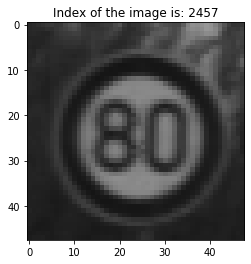

In [28]:
# Lets see a random image
random_sample = x_train_gr_smpl.sample(1)
random_sample_index = random_sample.index.values[0] # We'll need this later

visualize_image(random_sample, plt)

After we concatenate the labels to the features and instances, we can confirm what this image was using the index.

# DATA PREPARATION

Lets first concantenate the labels to the instances and features as one big dataframe.

In [15]:
# First the function to generate a list of label dataframes, which we will the concatanate one by one to the 
# instances and features dataframe

def generate_label_dfs():
    dataframes = []
    for k,v in labels_transient.items():
        # Set column label
        v.columns = [k[0]]
        # Convert 1s to the original label and leave 0s as 0s
        v.loc[v[k[0]] == 1, k[0]] = k[1]
        # And append the new df to the master df
        dataframes.append(v)
    return dataframes

In [18]:
# Now the concatenation
import pandas as pd

working_dataframe = x_train_gr_smpl
for label_df in generate_label_dfs():
    working_dataframe = pd.concat([working_dataframe, label_df], axis=1)

In [19]:
working_dataframe

,0,1,2,3,4,5,6,7,8,9,...,speed_limit_60,speed_limit_80,speed_limit_80_lifted,right_of_way_crossing,right_of_way_general,give_way,stop,no_speed_limit_general,turn_right_down,turn_left_down
0,30,29,28,29,31,30,29,28,27,26,...,0,5,6,11,12,13,14,32,38,39
1,31,31,33,32,31,30,29,28,28,28,...,0,5,6,11,12,13,14,32,38,39
2,30,30,31,29,28,27,26,28,30,31,...,0,5,6,11,12,13,14,32,38,39
3,26,25,24,24,24,27,28,29,29,30,...,0,5,6,11,12,13,14,32,38,39
4,25,26,28,28,28,28,28,27,26,25,...,0,5,6,11,12,13,14,32,38,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,8,8,7,7,8,8,8,8,8,8,...,3,5,6,11,12,13,14,32,38,0
12656,7,7,8,8,9,8,8,9,8,9,...,3,5,6,11,12,13,14,32,38,0
12657,9,10,9,9,9,9,11,10,10,10,...,3,5,6,11,12,13,14,32,38,0
12658,8,7,6,6,6,6,7,6,6,6,...,3,5,6,11,12,13,14,32,38,0


Done.

Now lets see what the label for our previosly visualized dataframe is using it's index:

In [25]:
# First separate the labels
labels = working_dataframe.iloc[:, 2304:] # All the rows, and columns staring where the last feature ends and the labels begin

In [29]:
# Now we see what the label for our image is
labels.iloc[random_sample_index,:]

speed_limit_60             3
speed_limit_80             0
speed_limit_80_lifted      6
right_of_way_crossing     11
right_of_way_general      12
give_way                  13
stop                      14
no_speed_limit_general    32
turn_right_down           38
turn_left_down            39
Name: 2457, dtype: int64

And there we have it.

But we should have one class/target feature column, not 10. So let's fix that. Now that we know the column with a zero is the one that is the label for that instance, we can write some code to replace that 0 with the original label number.

Here we go:

In [34]:
# First, the label mappings
label_mappings = {
    "speed_limit_60": 3,
    "speed_limit_80": 5,
    "speed_limit_80_lifted": 6,
    "right_of_way_crossing": 11,
    "right_of_way_general": 12,
    "give_way": 13,
    "stop": 14,
    "no_speed_limit_general": 32,
    "turn_right_down": 38,
    "turn_left_down": 39,
}

In [35]:
# This function will generate the class attribute "labels"
def make_class_attr():
    class_attributes = []
    for lb in labels.itertuples():
        for l in label_mappings.keys():
            if getattr(lb, l) == 0:
                class_attributes.append(label_mappings[l])
    return class_attributes

In [36]:
# Here we go
single_column_labels = pd.DataFrame(make_class_attr(), columns=['label'])

In [37]:
single_column_labels

,label
0,3
1,3
2,3
3,3
4,3
...,...
12655,39
12656,39
12657,39
12658,39


In [39]:
# Now we join that column to the instances and attributes and now we finally have a dataset to feed to our
# model
dataset = pd.concat([x_train_gr_smpl, single_column_labels], axis=1)

In [41]:
dataset.sample(7)

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
3900,88,62,51,43,42,47,56,78,101,101,...,27,26,24,25,27,29,30,29,28,11
1178,52,52,53,52,52,54,60,64,64,56,...,39,49,58,66,64,57,43,38,34,3
11248,7,6,8,11,9,8,9,15,19,21,...,9,9,10,10,10,11,12,13,12,38
8621,47,50,53,48,43,39,33,28,26,33,...,93,74,60,60,61,62,61,61,61,13
10771,25,25,24,24,25,25,26,25,25,24,...,69,132,236,172,123,95,76,57,41,38
1980,96,95,96,106,114,120,118,115,114,110,...,39,40,40,41,39,36,33,32,31,5
10026,255,255,255,255,255,255,255,255,255,255,...,72,71,70,68,69,75,87,114,134,14


Let's visualize a couple to make sure they are correctly labeled:

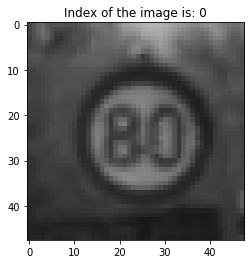

In [50]:
random_image = dataset.iloc[1989, :2304]
visualize_image(random_image, plt)

In [55]:
# Now we need to flip the labels dictionary so we can index by the label numbers
label_mappings = {v:k for k,v in label_mappings.items()}

In [54]:
# Now let's see whats at that label position
dataset.iloc[1989, 2304:].values[0]

5

In [56]:
# Now let's see which label is 5
print(label_mappings[dataset.iloc[1989, 2304:].values[0]])

speed_limit_80


We're good. Onward.

### Train-Test split

This is very important because the model will need to be tested on data it has never seen before, to confirm it's generalizing well (not overfitting; doesn't have high variance)

We'll do a 70-30 split, 70% of the dataset for training, and 30% for testing.

We will use the excellent [scikit-learn](https://scikit-learn.org/stable/) machine learning library from here on out.

In [58]:
# First we import the train_test_split function
from sklearn.model_selection import train_test_split

In [59]:
# Create labels and instances&features numpy arrays (scikit-learn mostly works with numpy arrays)
instances_features = dataset.iloc[:, :-1].values
labels = dataset['label'].values

In [61]:
# And do a stratified 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    instances_features,
    labels,
    # (70 30)% split
    test_size=0.3,
    # We want it stratified, labels equally distributed in the training and test datasets
    stratify=labels
)

The data is stratified and shuffled before splitting.

## Correlation

## Feature Selection

I did many of experiments (please see jupyter notebook <b>4_actual - Classification -- Performance of the Naive Bayes algorithm on the given data set</b> inside the scratch-pad folder for the experiments) to find out which automated feature selector would select the best features. Analysis of variace didn't work very well, at best producing a 39% accuracy dataset with 20% of the features using the SelectPercentile autoselector.

A model based selector using a RandomForest classifier with 100 tree worked well. We'll reproduce it below:

In [68]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [80]:
selector = SelectFromModel(
        RandomForestClassifier(
        n_estimators=100, # Chose this purely randomly
        random_state=1337, # deterministic randomization (oxymoron?)
        n_jobs=4, # I have 4 cores
    ),
    # produces 25% of the best features (mean is the mean of feature importances)
    # threshold="0.8*mean", It turns out this keeps varrying, so I'll set a hard limit at 25%
    threshold=-np.inf, # Disables threshold, so we can hard set a limit
    max_features=round((X_train.shape[1] * 25) / 100) # 25%
    # From the experiment, 25% of the best features produced the best accuracy
)

In [81]:
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=4,
                                                 oob_score=False,
                                                 random_state=1337, verbose=0,
     

In [82]:
X_train_selected = selector.transform(X_train)

In [83]:
# How many features selected, and which ones?
X_train_selected.shape

(8862, 576)

We have 25% of the best features for our images. Let's proceed to the classifier.

# CLASSIFICATION

## Naïve Bayes

In my experiments, I tried using Guassian Naive Bayes (GuassainNB). This did not produce good results. Complement Naive Bayes (ComplementNB) produced the best results. This is no surprise as it works best with imbalanced data, where some classes have waay more instances than others.

Do we have imbalanced data? Let's find out.

In [101]:
# Count frequency of labels
from tabulate import tabulate

table = []
for label_frequency in dataset['label'].value_counts().iteritems():
    # Print a table: Name, Label, Frequency
    table.append([label_mappings[label_frequency[0]], label_frequency[0], label_frequency[1]])

print(tabulate(
    table,
    headers=["Name", "Label", "Frequency"]
))

Name                      Label    Frequency
----------------------  -------  -----------
give_way                     13         2160
right_of_way_general         12         2100
turn_right_down              38         2070
speed_limit_80                5         1860
speed_limit_60                3         1410
right_of_way_crossing        11         1320
stop                         14          780
speed_limit_80_lifted         6          420
turn_left_down               39          300
no_speed_limit_general       32          240


<b>Extreamly so.</b>

In [84]:
# Let's import both classifiers
from sklearn.naive_bayes import ComplementNB

In [102]:
complement_naive_bayes = ComplementNB()

In [103]:
# Let's train the model
complement_naive_bayes.fit(X_train_selected, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [105]:
# Select the test set with the model selector
X_test_selected = selector.transform(X_test)

In [106]:
# Now we test the model with data it has never seen before. This will tell us if it generalized well.
complement_naive_bayes.score(X_test_selected, y_test)

0.718272775144813

71% accuracy.

And what are the actual predictions?

In [108]:
predicted = complement_naive_bayes.predict(X_test_selected)

### Analysis

In [107]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report
)

How does the confusion matrix look like?

In [120]:
confusion_matrix(y_test, predicted)

array([[ 29, 167,   0,  19,  63, 127,   0,   0,  18,   0],
       [  0, 313,   0,  25,  96, 107,   2,   0,  15,   0],
       [  0,   1,   0,   3, 122,   0,   0,   0,   0,   0],
       [  0,   0,   0, 357,  37,   2,   0,   0,   0,   0],
       [  0,  13,   0,  24, 578,  15,   0,   0,   0,   0],
       [  0,   1,   0,  17,  10, 620,   0,   0,   0,   0],
       [  0,   0,   0,   0,   4,   1, 227,   0,   2,   0],
       [  0,   4,   0,   0,  60,   0,   0,   0,   8,   0],
       [  0,   0,   0,   1,  23,  22,   0,   0, 575,   0],
       [  0,   2,   0,   4,  11,  44,   0,   0,   0,  29]])

In [122]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       1.00      0.07      0.13       423
           5       0.62      0.56      0.59       558
           6       0.00      0.00      0.00       126
          11       0.79      0.90      0.84       396
          12       0.58      0.92      0.71       630
          13       0.66      0.96      0.78       648
          14       0.99      0.97      0.98       234
          32       0.00      0.00      0.00        72
          38       0.93      0.93      0.93       621
          39       1.00      0.32      0.49        90

    accuracy                           0.72      3798
   macro avg       0.66      0.56      0.54      3798
weighted avg       0.73      0.72      0.66      3798



During a recent class, a presenter gleaned that floats computer better, and that estimators like values that are between 0 and 1. As it is, all values are in a fixed range 0-255, so converting them to values between 0-1 (by deviding with the max, does not change the meaning of the numbers, but let's see of the estimator does indeed like that range.

In [141]:
# Let's devide all values in the dataset by 255 (this also converts all data to floats)
instances_features = instances_features / 255

In [144]:
instances_features

array([[0.11764706, 0.11372549, 0.10980392, ..., 0.15294118, 0.15294118,
        0.14901961],
       [0.12156863, 0.12156863, 0.12941176, ..., 0.14901961, 0.14509804,
        0.14509804],
       [0.11764706, 0.11764706, 0.12156863, ..., 0.14901961, 0.15294118,
        0.15686275],
       ...,
       [0.03529412, 0.03921569, 0.03529412, ..., 0.03921569, 0.03529412,
        0.03529412],
       [0.03137255, 0.02745098, 0.02352941, ..., 0.03921569, 0.03529412,
        0.03529412],
       [0.03137255, 0.02745098, 0.02352941, ..., 0.03137255, 0.03529412,
        0.03137255]])

Now we do everything else as before

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    instances_features,
    labels,
    # (70 30)% split
    test_size=0.3,
    # We want it stratified, labels equally distributed in the training and test datasets
    stratify=labels
)

In [146]:
selector = SelectFromModel(
        RandomForestClassifier(
        n_estimators=100, # Chose this purely randomly
        random_state=1337, # deterministic randomization (oxymoron?)
        n_jobs=4, # I have 4 cores
    ),
    # produces 25% of the best features (mean is the mean of feature importances)
    # threshold="0.8*mean", It turns out this keeps varrying, so I'll set a hard limit at 25%
    threshold=-np.inf, # Disables threshold, so we can hard set a limit
    max_features=round((X_train.shape[1] * 25) / 100) # 25%
    # From the experiment, 25% of the best features produced the best accuracy
)

In [147]:
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=4,
                                                 oob_score=False,
                                                 random_state=1337, verbose=0,
     

In [148]:
X_train_selected = selector.transform(X_train)

In [149]:
complement_naive_bayes = ComplementNB()

In [150]:
complement_naive_bayes.fit(X_train_selected, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [151]:
X_test_selected = selector.transform(X_test)

In [152]:
complement_naive_bayes.score(X_test_selected, y_test)

0.7132701421800948

As suspected, no difference. Let's have a look at the confusion matrix:

In [153]:
confusion_matrix(y_test, predicted)

array([[  3,  55,   0,  43, 105, 123,  20,   0,  69,   5],
       [  6,  74,   0,  67, 146, 142,  29,   0,  86,   8],
       [  1,  14,   0,  20,  31,  26,  13,   0,  21,   0],
       [  0,  45,   0,  58, 127,  89,  21,   0,  55,   1],
       [  4,  90,   0,  66, 170, 145,  42,   0, 109,   4],
       [  7,  86,   0,  79, 173, 154,  41,   0, 105,   3],
       [  1,  34,   0,  23,  57,  65,  17,   0,  36,   1],
       [  0,  12,   0,   8,  23,  15,   1,   0,  13,   0],
       [  7,  77,   0,  74, 151, 157,  39,   0, 109,   7],
       [  0,  14,   0,  12,  21,  22,   6,   0,  15,   0]])

Lots more in the false positives and negatives. And just to confirm, X_train_selected *is* the floats.

In [ ]:
y_testst

In [154]:
X_train_selected

array([[0.70980392, 0.47058824, 0.41960784, ..., 0.50980392, 0.61960784,
        0.61568627],
       [0.91372549, 0.94509804, 0.9372549 , ..., 0.9372549 , 0.84313725,
        0.82352941],
       [0.41568627, 0.44313725, 0.2       , ..., 0.33333333, 0.45882353,
        0.37254902],
       ...,
       [0.24705882, 0.25490196, 0.21568627, ..., 0.31764706, 0.1254902 ,
        0.49019608],
       [0.28235294, 0.2627451 , 0.2627451 , ..., 0.23137255, 0.68627451,
        0.35686275],
       [0.60392157, 0.99607843, 0.96862745, ..., 0.34117647, 0.96862745,
        0.96862745]])

Finally, we were taught about t-SNE for dimensionality reduction. Let's feed our dataset to it and see if it performs better than the ModelSelector via RandomForest. For this though, I'm scalling them back up to their original 0-255 range.

In [156]:
from sklearn.manifold import TSNE

In [160]:
selector = TSNE(
    n_components=3, # Should be less than 4 as "the barnes_hut algorithm as it relies on quad-tree or oct-tree".
    perplexity=25  # This is a nob type hyperparameter, where trial an error dertmins the best setting
    # Starting with 25
)

In [168]:
# get back the original features and instances
instances_features = dataset.iloc[:, :-1].values

array([[30, 29, 28, ..., 39, 39, 38],
       [31, 31, 33, ..., 38, 37, 37],
       [30, 30, 31, ..., 38, 39, 40],
       ...,
       [ 9, 10,  9, ..., 10,  9,  9],
       [ 8,  7,  6, ..., 10,  9,  9],
       [ 8,  7,  6, ...,  8,  9,  8]])

In [169]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    instances_features,
    labels,
    # (70 30)% split
    test_size=0.3,
    # We want it stratified, labels equally distributed in the training and test datasets
    stratify=labels
)

Now everything else as before

In [189]:
X_train_selected = selector.fit_transform(X_train) # TSNE seems to need to do the fit and transform together

In [190]:
X_train_selected

array([[-16.395653 , -12.676    ,   9.493431 ],
       [ 13.56296  ,   4.5217805,  10.156498 ],
       [ 28.175575 ,  -5.7604976,   3.6203792],
       ...,
       [-11.76564  ,  18.47725  , -15.720929 ],
       [-10.249477 ,  32.35874  ,   1.6912718],
       [ 29.04101  , -11.525595 ,   9.437087 ]], dtype=float32)

It has some nagatives. Probability based estimators don't work with values below 0. MinMax will set it between 0 and 1 without losing data meaning.

In [192]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=False) # In-place scalling

scaler.fit_transform(X_train_selected)

array([[0.25188637, 0.35320392, 0.6251868 ],
       [0.7107171 , 0.5923503 , 0.6359895 ],
       [0.93451643, 0.4493685 , 0.52950305],
       ...,
       [0.32279727, 0.7864102 , 0.21439439],
       [0.34601802, 0.9794415 , 0.49807402],
       [0.94777095, 0.36920106, 0.6242689 ]], dtype=float32)

In [193]:
X_train_selected

array([[0.25188637, 0.35320392, 0.6251868 ],
       [0.7107171 , 0.5923503 , 0.6359895 ],
       [0.93451643, 0.4493685 , 0.52950305],
       ...,
       [0.32279727, 0.7864102 , 0.21439439],
       [0.34601802, 0.9794415 , 0.49807402],
       [0.94777095, 0.36920106, 0.6242689 ]], dtype=float32)

Now we train CNB

In [194]:
# Use the existing CNB
complement_naive_bayes.fit(X_train_selected, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [195]:
X_test_selected = scaler.fit_transform(selector.fit_transform(X_test)) # Same here

In [196]:
X_test_selected

array([[0.50395775, 0.24635433, 0.4466719 ],
       [0.7431659 , 0.41412696, 0.7639754 ],
       [0.1328395 , 0.47503644, 0.33915174],
       ...,
       [0.5620146 , 0.17364907, 0.7075967 ],
       [0.47931764, 0.6378353 , 0.51143694],
       [0.28039712, 0.46371415, 0.8531431 ]], dtype=float32)

In [197]:
complement_naive_bayes.score(X_test_selected, y_test)

0.12322274881516587

12% accuracy. TSNE didn't work very well for this dataset.

## Bayesian Network

# CLUSTERING

Clustering finds similar instances and groups them. Here we shall use the k-means clustering algorithm to cluster our dataset.

## k-means

k-means sets a centrod based on the mean of the cluster, and finishes when the instace assignments no longer change.

In [198]:
from sklearn.cluster import KMeans

Okay; so we know we have 10 clusters, (10 labels). Let's tell k-means to look for 10 clusters.

What dataset do we feed it though? Being that there is no training here, it's the original instances and attributes.

In [199]:
instances_features = dataset.iloc[:, :-1].values

In [200]:
clusterer = KMeans(n_clusters=10)

In [201]:
clusterer.fit(instances_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [204]:
# Let's let numpy print the whole array
import sys
np.set_printoptions(threshold=sys.maxsize)

In [208]:
clusters = clusterer.predict(instances_features)

In [207]:
# Lets see if this is right
# But how do we know which instance is which group?
# I wonder if they are in order of the instances?
import seaborn as sns
sns.set()

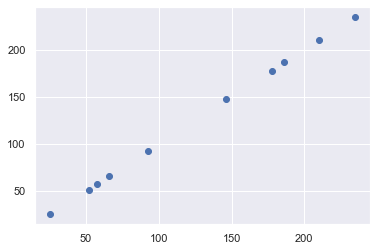

In [236]:
# This shows the location of the clusters
centers = clusterer.cluster_centers_
plt.scatter(centers[:,0], centers[:,1])

In [235]:
# Frequencies
np.unique(clusters, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([ 810, 1621,  888, 2832,  584, 2718,  723,  838, 1189,  457]))

In [266]:
clusters.shape

(12660,)

This shows the number of instances in each cluster, but how do we know from the labels whether the instances are correctly clustered?

# RESEARCH QUESTION

#### Q: Given data, is it possible to determin which data nomrmalizarion method, which dimensionality reduction algorithm and which classification algorith will work best with it?

Generit programming is an optimizer than can prove useful in this case. [TPot](https://github.com/EpistasisLab/tpot) is a Python library that is specifically implemented for this task. From the [documentation](http://epistasislab.github.io/tpot/):
"TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines to find the best one for your data."

Let's give it a try.

In [238]:
# The labels are the same; lets get fresh instances and attributes data.
instances_features = dataset.iloc[:, :-1].values

In [239]:
# We cant to classify, so let's import the TPOTClassifier
from tpot import TPOTClassifier

In [240]:
X_train, X_test, y_train, y_test = train_test_split(
    instances_features,
    labels, 
    test_size=0.30 # Still a 70/30 split
)

In [244]:
# Now instantiate the optimizer
pipeline_optimizer = TPOTClassifier(
    generations=5, # Starting point
    population_size=20, # ''
    cv=5, # Five fold cross validation
    random_state=1337, # Deterministic results on the same dataset each run
    verbosity=2,
)

In [245]:
# The actual run
pipeline_optimizer.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.9700996931070645
Generation 2 - Current best internal CV score: 0.9700996931070645
Generation 3 - Current best internal CV score: 0.9714542304143521
Generation 4 - Current best internal CV score: 0.972357100575483
Generation 5 - Current best internal CV score: 0.9782242810302799

Best pipeline: ExtraTreesClassifier(MinMaxScaler(input_matrix), bootstrap=True, criterion=entropy, max_features=0.3, min_samples_leaf=4, min_samples_split=18, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=1337, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

That's 97% accuracy! let's see the score:

In [246]:
pipeline_optimizer.score(X_test, y_test)

0.9807793575566087

98% accuracy. This is with only 5 generations!

In [248]:
# We can export the code that TPOT generated
print(pipeline_optimizer.export())

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=1337)

# Average CV score on the training set was: 0.9782242810302799
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.3, min_samples_leaf=4, min_samples_split=18, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipelin

In [259]:
# The confusion matrix:
predicted = pipeline_optimizer.predict(X_test)
confusion_matrix(y_test, predicted)

array([[399,  26,   0,   0,   4,   1,   1,   0,   0,   0],
       [  9, 589,   0,   0,   2,   4,   0,   0,   4,   1],
       [  0,   2, 112,   0,   0,   0,   0,   1,   0,   0],
       [  0,   1,   0, 402,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0,   0, 598,   3,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 656,   0,   0,   3,   0],
       [  0,   0,   0,   1,   0,   0, 231,   0,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0,  65,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0, 593,   0],
       [  0,   1,   0,   0,   1,   0,   0,   0,   0,  80]])

In [261]:
# A full report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.98      0.93      0.95       431
           5       0.95      0.97      0.96       609
           6       1.00      0.97      0.99       115
          11       1.00      1.00      1.00       403
          12       0.98      0.99      0.99       605
          13       0.99      1.00      0.99       659
          14       1.00      1.00      1.00       232
          32       0.98      0.96      0.97        68
          38       0.99      1.00      0.99       594
          39       0.99      0.98      0.98        82

    accuracy                           0.98      3798
   macro avg       0.98      0.98      0.98      3798
weighted avg       0.98      0.98      0.98      3798

